In [35]:
ls data

airbnb.csv  test.csv  train.csv


In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
%matplotlib inline

In [37]:
df = pd.read_csv('data/airbnb.csv')
df.head()

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008,8/11,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008,9/24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008,10/19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008,11/30,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008,12/17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


In [38]:
df.shape

(7833, 33)

In [189]:
df.isnull().sum()

host_id                           0
host_name                         0
host_since_year                   0
host_since_anniversary            0
id                                0
neighbourhood_cleansed            0
city                              0
state                             8
zipcode                         173
country                           0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        69
bedrooms                         14
beds                             13
bed_type                          0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
host_response_time              732
host_response_rate              732
number_of_reviews                 0
review_scores_rating           1698
review_scores_accuracy      

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      7833 non-null   int64  
 1   host_name                    7833 non-null   object 
 2   host_since_year              7833 non-null   int64  
 3   host_since_anniversary       7833 non-null   object 
 4   id                           7833 non-null   int64  
 5   neighbourhood_cleansed       7833 non-null   object 
 6   city                         7833 non-null   object 
 7   state                        7825 non-null   object 
 8   zipcode                      7660 non-null   object 
 9   country                      7833 non-null   object 
 10  latitude                     7833 non-null   float64
 11  longitude                    7833 non-null   float64
 12  property_type                7833 non-null   object 
 13  room_type         

In [41]:
df.describe()

,host_id,host_since_year,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,7.833000e+03,7833.000000,7.833000e+03,7833.000000,7833.000000,7833.000000,7764.000000,7819.000000,7820.000000,7833.000000,7833.000000,7833.000000,7833.000000,7101.000000,7833.000000,6135.000000,6124.000000,6124.000000,6125.000000,6122.000000,6124.000000,6122.000000
mean,9.879849e+06,2012.929784,2.926936e+06,52.366533,4.888232,3.114643,1.112957,1.414887,1.983887,129.010979,1.641900,13.617133,2.509000,0.908396,13.832887,93.342298,9.446930,9.289517,9.638857,9.698301,9.292946,9.040346
std,7.932933e+06,1.174583,1.739974e+06,0.014116,0.030059,1.757483,0.394872,0.886217,1.654441,128.032413,1.145144,18.911285,1.898255,0.151901,25.476797,7.535279,0.815671,0.967856,0.726375,0.645667,0.849480,0.881756
min,1.662000e+03,2008.000000,2.818000e+03,52.291569,4.763264,1.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,1.000000,0.020000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.430410e+06,2012.000000,1.309364e+06,52.356731,4.869670,2.000000,1.000000,1.000000,1.000000,85.000000,1.000000,0.000000,1.000000,0.880000,1.000000,90.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000
50%,7.392601e+06,2013.000000,2.964891e+06,52.366538,4.886406,2.000000,1.000000,1.000000,1.000000,109.000000,1.000000,0.000000,2.000000,1.000000,5.000000,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000
75%,1.505417e+07,2014.000000,4.473450e+06,52.375805,4.903265,4.000000,1.000000,2.000000,2.000000,150.000000,2.000000,25.000000,3.000000,1.000000,15.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,3.059504e+07,2015.000000,5.897527e+06,52.425381,5.019667,16.000000,8.000000,10.000000,16.000000,9000.000000,16.000000,235.000000,27.000000,1.000000,297.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f839e1e8610>,
      dtype=object)

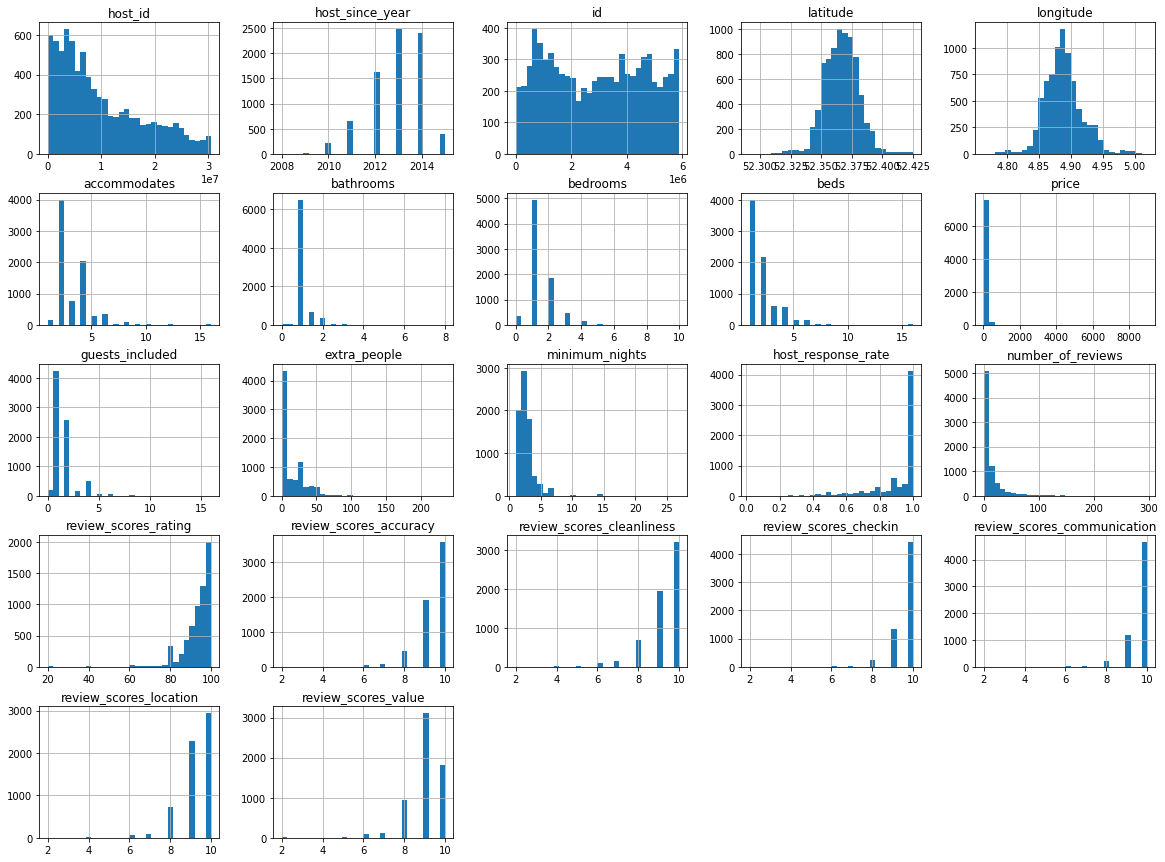

In [45]:
df.hist(bins=30, figsize=(20,15))

In [46]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state = 9)

In [47]:
train_set.head()

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
6279,17403109,Lennart,2014,6/29,3453582,De Baarsjes - Oud-West,Amsterdam,North Holland,1054 BS,Netherlands,52.360072,4.861284,Apartment,Entire home/apt,2,1.5,1.0,1.0,Real Bed,150,2,0,3,within a few hours,0.9,9,98.0,10.0,10.0,10.0,10.0,10.0,10.0
3407,6401535,Sophie,2013,5/15,1169001,Oud-Oost,Amsterdam,North Holland,1091 VD,Netherlands,52.357042,4.918278,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,75,1,0,1,within a day,0.5,20,98.0,10.0,10.0,10.0,10.0,9.0,9.0
3739,6999042,Douwe&Niki,2013,6/19,4843449,Centrum-West,Amsterdam,Noord-Holland,1015 JZ,Netherlands,52.380781,4.883107,House,Entire home/apt,4,1.5,1.0,2.0,Real Bed,130,2,35,3,within an hour,1.0,1,80.0,10.0,6.0,8.0,10.0,10.0,10.0
6638,19801139,Vanessa,2014,8/10,4525538,Noord-West,Amsterdam,North Holland,NaN,Netherlands,52.407197,4.898093,Apartment,Entire home/apt,2,1.0,2.0,1.0,Real Bed,150,0,0,2,within an hour,1.0,1,100.0,NaN,NaN,NaN,NaN,NaN,NaN
4771,10045869,Barbara,2013,11/16,1942082,De Baarsjes - Oud-West,Amsterdam,North Holland,1054,Netherlands,52.363074,4.867949,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,122,1,0,2,within a few hours,0.9,35,98.0,10.0,10.0,10.0,10.0,10.0,9.0


In [48]:
train_set.shape

(6266, 33)

In [152]:
np.percentile(train_set['price'], 95)

275.0

In [61]:
train_set['price'].sort_values()

429       19
7108      20
2830      20
4300      21
4324      21
        ... 
7737    1000
6927    1305
2343    1400
4976    1495
4092    9000
Name: price, Length: 6266, dtype: int64

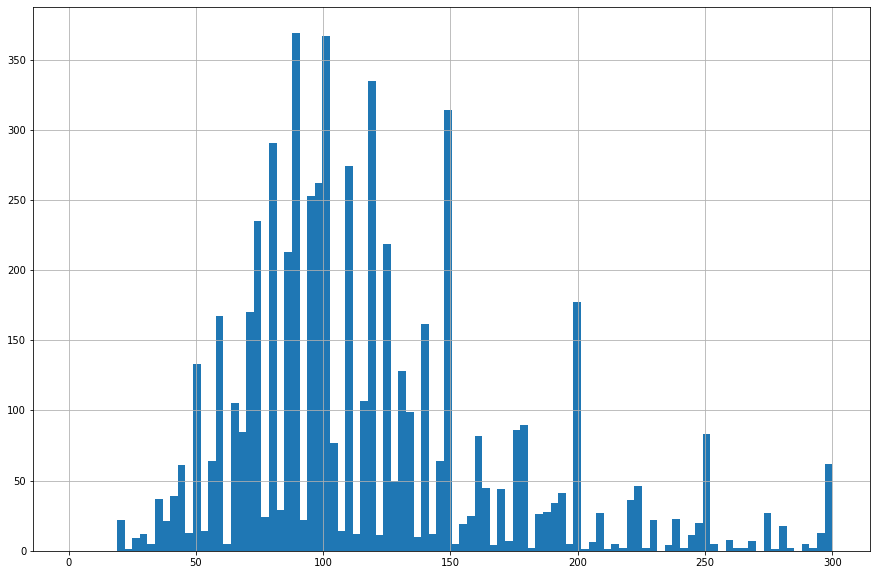

In [153]:
train_set['price'].hist(bins=100, range=[1, 300], figsize=(15, 10))

In [155]:
def MissFitData(df, percentil):
  percen = np.percentile(df['price'], percentil)
  drop = df[df['price'] <= percen]
  return drop

In [157]:
housing = MissFitData(df = train_set, percentil = 99)
housing.shape

(6203, 33)

In [168]:
corr_matrix = housing.corr()
correlations = corr_matrix['price'].sort_values(ascending=False)
correlations

price                          1.000000
bedrooms                       0.527958
accommodates                   0.498034
beds                           0.447922
guests_included                0.366648
bathrooms                      0.298476
review_scores_location         0.193137
extra_people                   0.176804
review_scores_rating           0.100549
review_scores_accuracy         0.065439
longitude                      0.052772
review_scores_cleanliness      0.050340
minimum_nights                 0.043262
host_response_rate             0.036804
review_scores_checkin          0.035527
review_scores_communication    0.034307
latitude                       0.029189
review_scores_value            0.027370
id                            -0.014141
host_since_year               -0.045063
host_id                       -0.051432
number_of_reviews             -0.114308
Name: price, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['price', 'bedrooms', 'accommodates', 'beds', 'guests_included', 'bathrooms', 'review_scores_location', 'extra_people', 'review_scores_rating']
corr_plot = scatter_matrix(housing[attributes], figsize=(30,50))

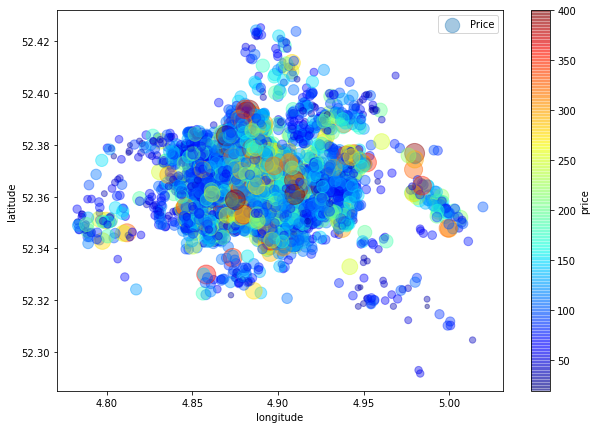

In [184]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.4, s=housing['price'], label = 'Price', figsize=(10, 7), c="price", cmap=plt.get_cmap("jet"),
             colorbar=True, sharex=False)

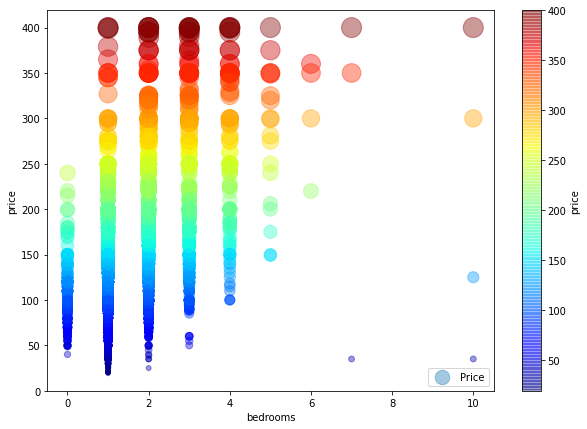

In [186]:
housing.plot(kind="scatter", x="bedrooms", y="price", alpha = 0.4, s=housing['price'], label = 'Price', figsize=(10, 7), c="price", cmap=plt.get_cmap("jet"),
             colorbar=True, sharex=False)

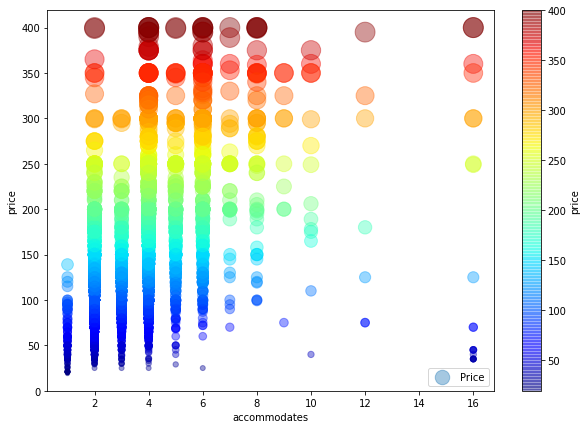

In [187]:
housing.plot(kind="scatter", x="accommodates", y="price", alpha = 0.4, s=housing['price'], label = 'Price', figsize=(10, 7), c="price", cmap=plt.get_cmap("jet"),
             colorbar=True, sharex=False)